# Corolla 2010 (MPG)

I have been recoding my car's gas consumption since August 2013 (purchased on June of 2013) in order to track the MPG (miles per galon) evolution over time. If the milage get's too low, it will be time to get a new car. 

(Disclamer: This is not a comprehensive study of corolla's efficiency. It is just an analysis of my personal vehicle to demonstrate how easy it is to use pandas, pymongo and matplotlib to visualize data with a few lines of code) 

In [1]:
import pandas as pd
import pymongo
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn

The database saved at *~/db/gas_repeipts.json* is called **'corolla_2010'** and it contains a collection called **'gas_receipts'**. 

In [2]:
connection = pymongo.Connection()
db = connection.corolla_2010
gas_data = db.gas_receipts

In [3]:
data = pd.DataFrame(list(gas_data.find()))

Each record in **gas_receipts** has this information:

* date
* **miles** traveled
* ppg (price per galon)
* **total** money spent filling the tank

Note: I fill up the tank at ~1/4


In [4]:
data[0:3]

,_id,date,galons,miles,ppg,total
0,5879ab7cd930220865146181,2017-01-12 23:15:04,8.605,263.5,2.499,21.50
1,5879aed6d930220865146183,2015-10-15 23:18:00,8.628,293.0,2.199,18.97
2,5879b02ed930220865146184,2014-05-06 00:02:00,8.283,232.7,3.439,28.49


In [5]:
data = data.sort_values(by='date')

# ppg, galons, miles and total recorded per trip to gas station 

The describe method of a DataFrame gives us usefull statistics

In [6]:
data['total'].describe()

count    142.000000
mean      21.299437
std        4.737616
min        9.220000
25%       17.735000
50%       20.990000
75%       24.832500
max       31.170000
Name: total, dtype: float64

Auxiliary function to add statistics to a plot using DataFrame.describe

In [7]:
def add_stats_to_plot(plot, data):
    '''
    Add firt, second and third quartiles information to a histogram plot
    as text and drawing yellow lines at each quartile
    '''
    plot.text(.15,.7, 'Q1: ' + str(data.describe()['25%']),transform=plot.transAxes)
    plot.text(.15,.78, 'Q2: ' + str(data.describe()['50%']),transform=plot.transAxes)
    plot.text(.15,.86, 'Q3: ' + str(data.describe()['75%']),transform=plot.transAxes)
    plot.axvline(x=data.describe()['25%'], ymin=0.0, 
                 ymax = data.count(), linewidth=1, color='yellow')
    plot.axvline(x=data.describe()['50%'], ymin=0.0, 
                 ymax = data.count(), linewidth=1, color='yellow')
    plot.axvline(x=data.describe()['75%'], ymin=0.0, 
                 ymax = data.count(), linewidth=1, color='yellow')    

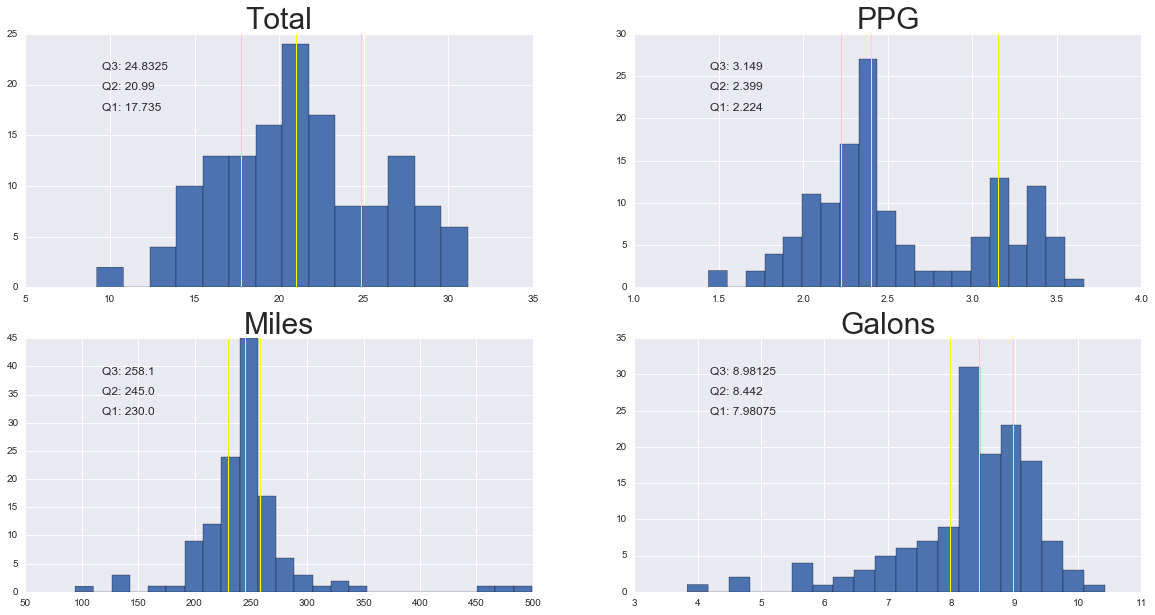

In [8]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
ax1.set_title('Total', fontsize=30)
ax1.hist(data['total'], bins = 14);
ax2.set_title('PPG', fontsize=30)
ax2.hist(data['ppg'], bins = 20);
## Drop NA values for miles, since I did not always record those
ax3.set_title('Miles', fontsize=30)
ax3.hist(data['miles'].dropna(), bins = 25);
ax4.set_title('Galons', fontsize=30)
ax4.hist(data['galons'], bins = 20);

add_stats_to_plot(ax1, data['total'])
add_stats_to_plot(ax2, data['ppg'])
add_stats_to_plot(ax3, data['miles'])
add_stats_to_plot(ax4, data['galons'])

# PPG (price per galon) thourgh time

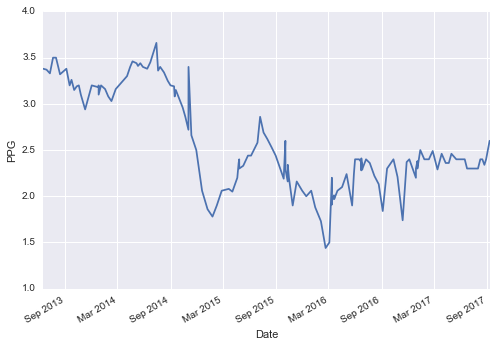

In [12]:
#create ppg time series
ppg_series = pd.Series(data['ppg'].values, index = data['date'])
ax = ppg_series.plot()
ax.set_ylabel('PPG')
ax.set_xlabel('Date')

# PPG (price per galon) thourgh time

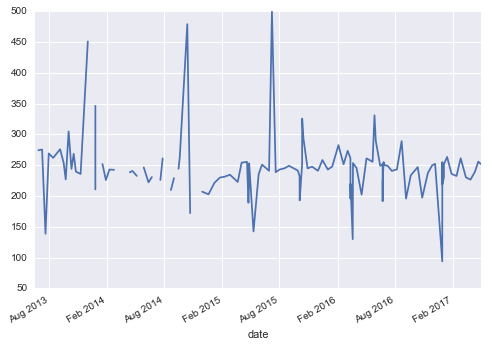

In [10]:
#create miles time series
miles_series = pd.Series(data['miles'].values, index = data['date'])
miles_series.plot()


In [ ]:
ax.plot(data['date'], data['ppg'])

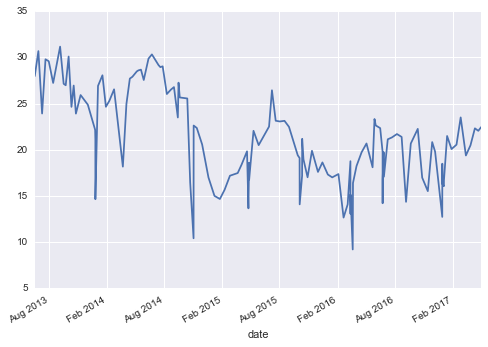

In [11]:
#create total time series
total_series = pd.Series(data['total'].values, index = data['date'])
total_series.plot()


# Miles Per Galon through time

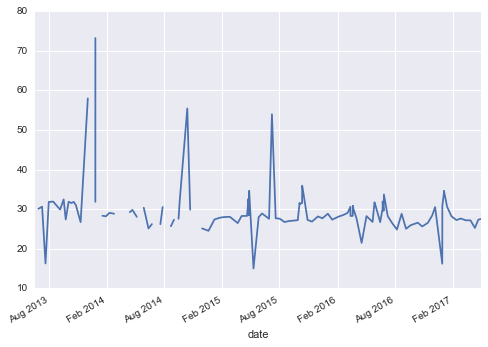

In [12]:
#create MPG time series
mpg_series = pd.Series(data['miles'].values/data['galons'].values, index = data['date'])
mpg_series.plot()

In [292]:
mpg_series.describe()

count    107.000000
mean      29.876811
std        7.000595
min       15.045930
25%       27.358822
50%       28.538080
75%       30.961454
max       73.219193
dtype: float64